In [79]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('tdrstyle.mplstyle')

In [80]:
# Calculate B field in ideal ATLAS toroid as function of radius [m]
def B(R):
    Rin = 1.05
    Rout = 5.10
    Bmax = 4.1
    if R < Rin :
        return 0
    elif R > Rout :
        return 0
    return Bmax*Rin/R
#    return Bmax

In [81]:
B(5.1)

0.8441176470588235

In [82]:
# sagitta in toroid given p[GeV], radius in toroid [m], and length traversed [m]
def sagitta (p, r, l): 
    return 0.3/8*l*l*B(r)/p

In [83]:
# Calculate eta from Theta
def Eta(Theta):
    return -np.log(np.tan(Theta/2))

In [84]:
# Calculate Theta from R and Z
def ThetaRZ(R,Z):
    return np.arctan(R/Z)

In [85]:
def EtaRZ(R,Z):
    return Eta(ThetaRZ(R,Z))

In [86]:
rmin = 1.05 # m, toroid inner radius
rmax = 5.10 # m, toroid outer radius
len = 4.5 # m, toroid depth
pgen = 1000 # GeV, muon momentum
dr = 0.1
res = 150 # position res in microns
Zpos0 = 28 # m zeroeth station location (Trying to span from eta=2.4 to 4.0)
Zpos1 = 60 # m first station location (2 station version starting from eta=3.15)
Zpos2 = 300 # m second station location (2 station version starting from eta=3.15)
#Zpos1 = 136 # m first station location  (3 station version from eta=4.0 to 5.55)
#Zpos2 = 660 # m second station location  (3 station version from eta=5.55 to 7.15)
rvalues = np.arange(rmin, rmax, dr)
bvalues = [0] * rvalues.size
svalues = [0] * rvalues.size
drvalues = [0] * rvalues.size
resvalues = [0] * rvalues.size
etavalues1  = [0] * rvalues.size
etavalues2  = [0] * rvalues.size
for i in range(rvalues.size):
  bvalues[i] = B(rvalues[i])
  svalues[i] = sagitta(pgen,rvalues[i],len)*1E6
  drvalues[i] = 4*svalues[i] # dr is 4s (not 2s!)
  resvalues[i] = res*np.sqrt(2)/(drvalues[i])*100 # sqrt(2) because difference of two r measurements
  etavalues1[i] = EtaRZ(rvalues[i],Zpos1)
  etavalues2[i] = EtaRZ(rvalues[i],Zpos2)

Text(0.5, 0, 'r [m]')

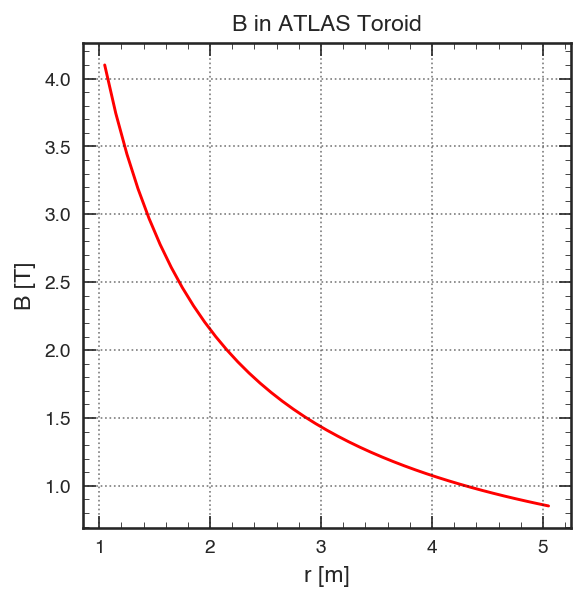

In [87]:
plt.plot(rvalues, bvalues,'r')
plt.title('B in ATLAS Toroid')
plt.ylabel('B [T]')
plt.xlabel('r [m]')

Text(0.5, 0, 'r [m]')

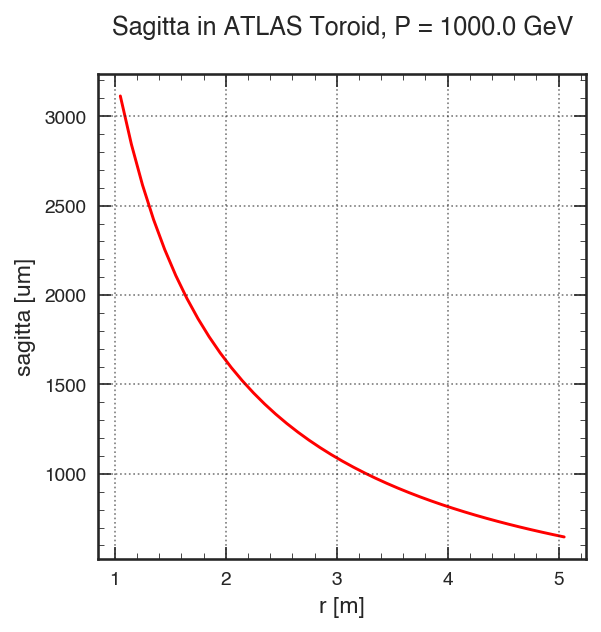

In [88]:
plt.plot(rvalues, svalues,'r')
plt.title('Sagitta in ATLAS Toroid, P = %.1f GeV\n' %(pgen), fontsize=12)
plt.ylabel('sagitta [um]')
plt.xlabel('r [m]')

Text(0.5, 0, 'r [m]')

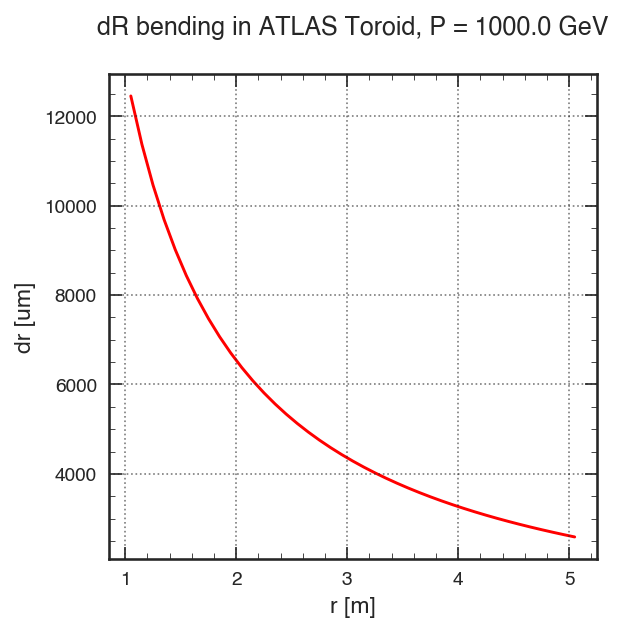

In [89]:
plt.plot(rvalues, drvalues,'r')
plt.title('dR bending in ATLAS Toroid, P = %.1f GeV\n' %(pgen), fontsize=12)
plt.ylabel('dr [um]')
plt.xlabel('r [m]')

In [90]:
# Show resolution for other momenta, assuming prop. to momentum
resvalues1 = [0] * rvalues.size
resvalues2 = [0] * rvalues.size
resvalues3 = [0] * rvalues.size
for i in range(rvalues.size):
  resvalues1[i] = resvalues[i] * 0.75
  resvalues2[i] = resvalues[i] * 0.5
  resvalues3[i] = resvalues[i] * 0.25

Text(0.5, 0, 'r [m]')

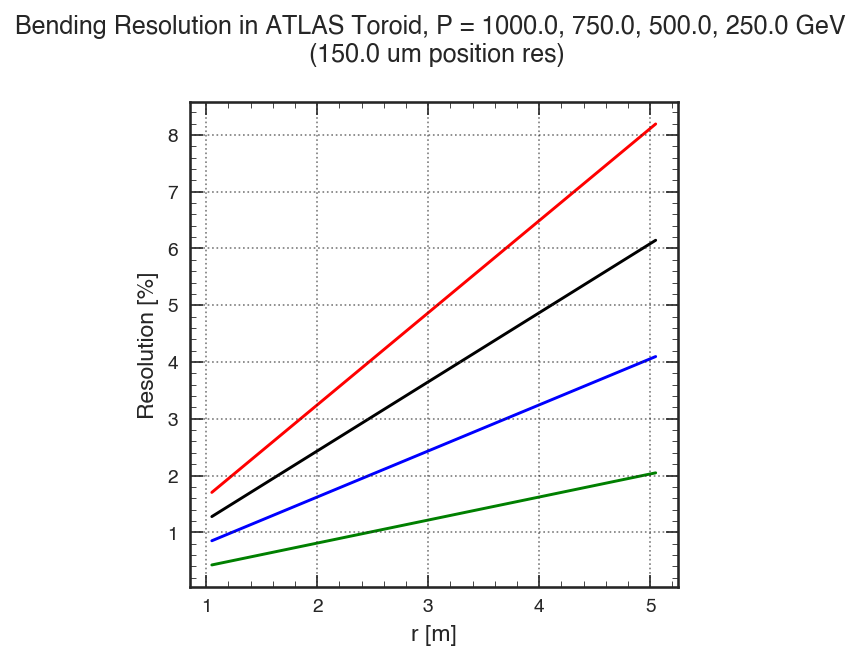

In [91]:
plt.plot(rvalues, resvalues,'r')
plt.plot(rvalues, resvalues1,'k')
plt.plot(rvalues, resvalues2,'b')
plt.plot(rvalues, resvalues3,'g')
plt.title('Bending Resolution in ATLAS Toroid, P = %.1f, %.1f, %.1f, %.1f GeV \n (%.1f um position res)\n' %(pgen, pgen*0.75, pgen*0.5, pgen*0.25, res), fontsize=12)
plt.ylabel('Resolution [%]')
plt.xlabel('r [m]')

In [92]:
EtaRZ(5,60)

3.179785437699879

Text(0.5, 0, 'eta')

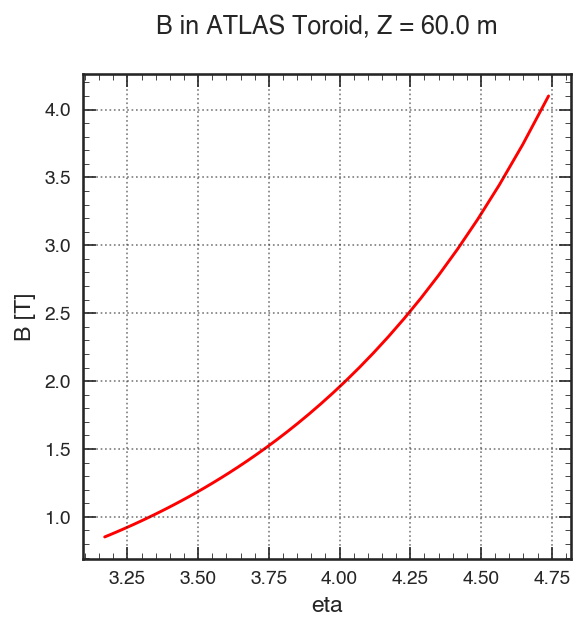

In [93]:
plt.plot(etavalues1, bvalues,'r')
plt.title('B in ATLAS Toroid, Z = %.1f m\n' %(Zpos1), fontsize=12)
plt.ylabel('B [T]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

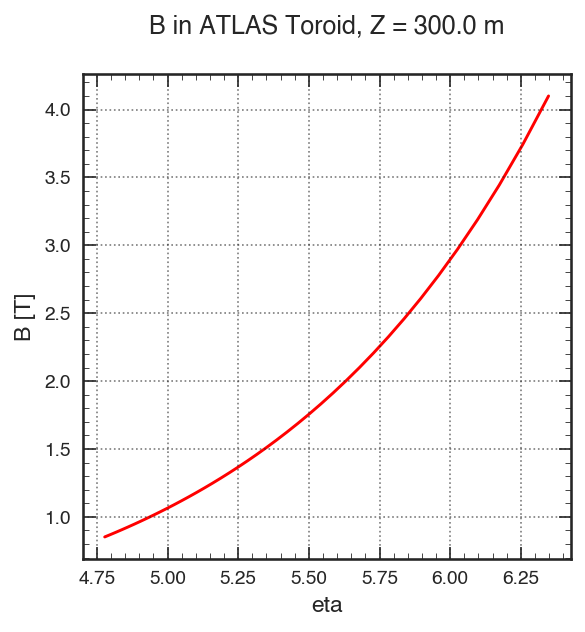

In [94]:
plt.plot(etavalues2, bvalues,'r')
plt.title('B in ATLAS Toroid, Z = %.1f m\n' %(Zpos2), fontsize=12)
plt.ylabel('B [T]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

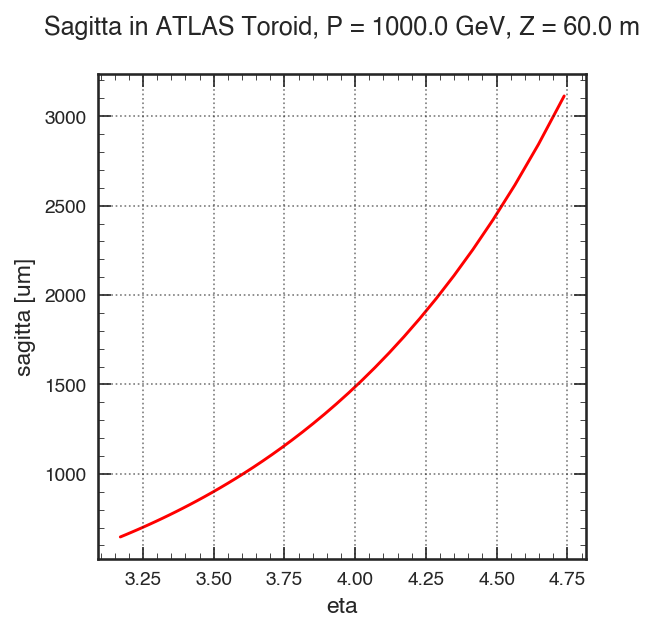

In [95]:
plt.plot(etavalues1, svalues,'r')
plt.title('Sagitta in ATLAS Toroid, P = %.1f GeV, Z = %.1f m\n' %(pgen, Zpos1), fontsize=12)
plt.ylabel('sagitta [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

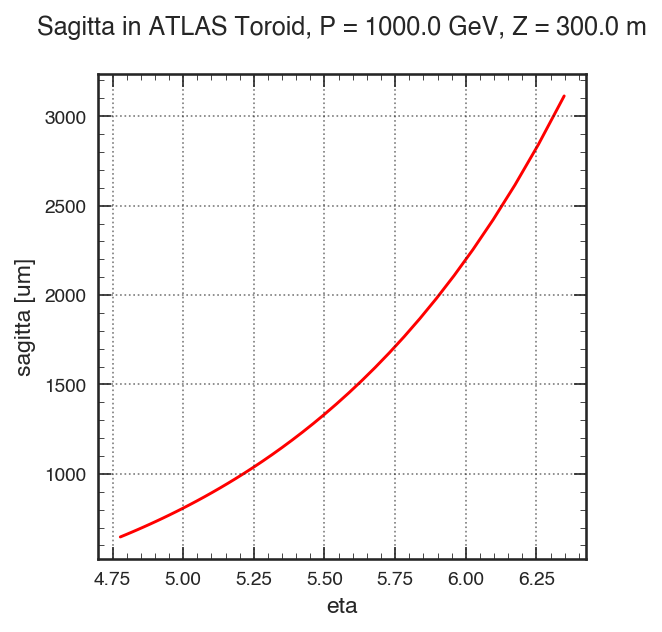

In [96]:
plt.plot(etavalues2, svalues,'r')
plt.title('Sagitta in ATLAS Toroid, P = %.1f GeV, Z = %.1f m\n' %(pgen, Zpos2), fontsize=12)
plt.ylabel('sagitta [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

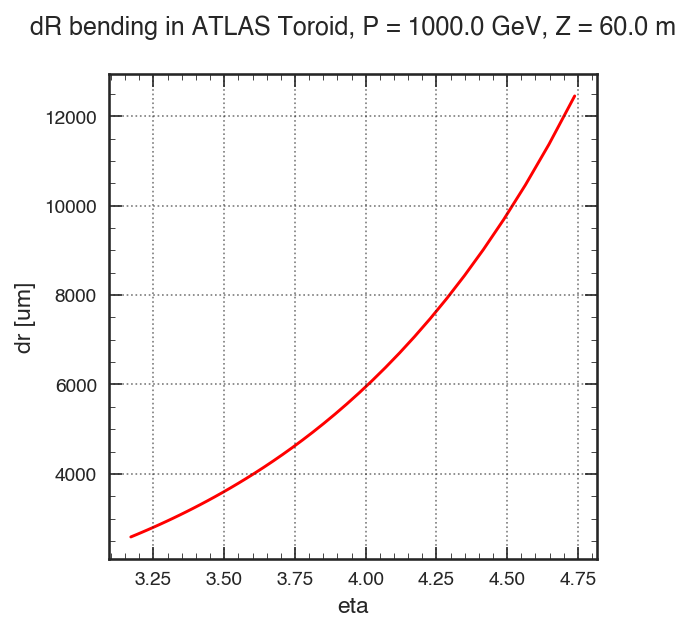

In [97]:
plt.plot(etavalues1, drvalues,'r')
plt.title('dR bending in ATLAS Toroid, P = %.1f GeV, Z = %.1f m\n' %(pgen, Zpos1), fontsize=12)
plt.ylabel('dr [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

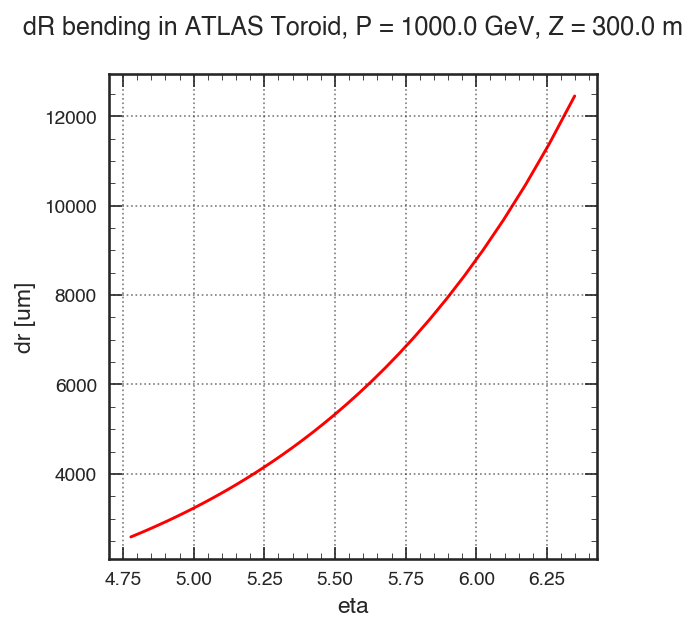

In [98]:
plt.plot(etavalues2, drvalues,'r')
plt.title('dR bending in ATLAS Toroid, P = %.1f GeV, Z = %.1f m\n' %(pgen,Zpos2), fontsize=12)
plt.ylabel('dr [um]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

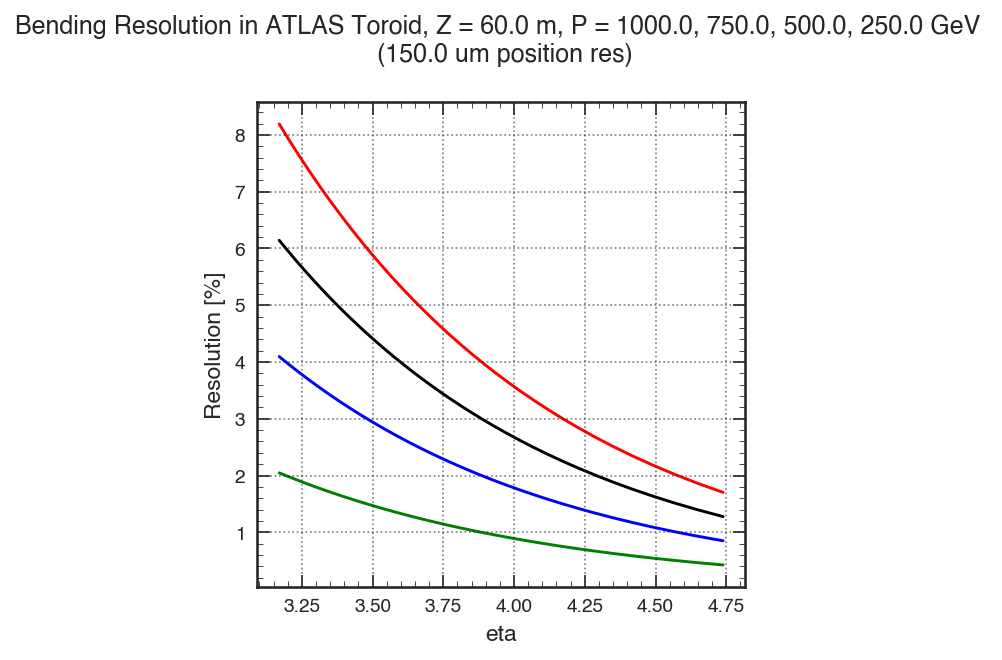

In [99]:
plt.plot(etavalues1, resvalues,'r')
plt.plot(etavalues1, resvalues1,'k')
plt.plot(etavalues1, resvalues2,'b')
plt.plot(etavalues1, resvalues3,'g')
plt.title('Bending Resolution in ATLAS Toroid, Z = %.1f m, P = %.1f, %.1f, %.1f, %.1f GeV \n (%.1f um position res)\n' %(Zpos1, pgen, pgen*0.75, pgen*0.5, pgen*0.25, res), fontsize=12)
plt.ylabel('Resolution [%]')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

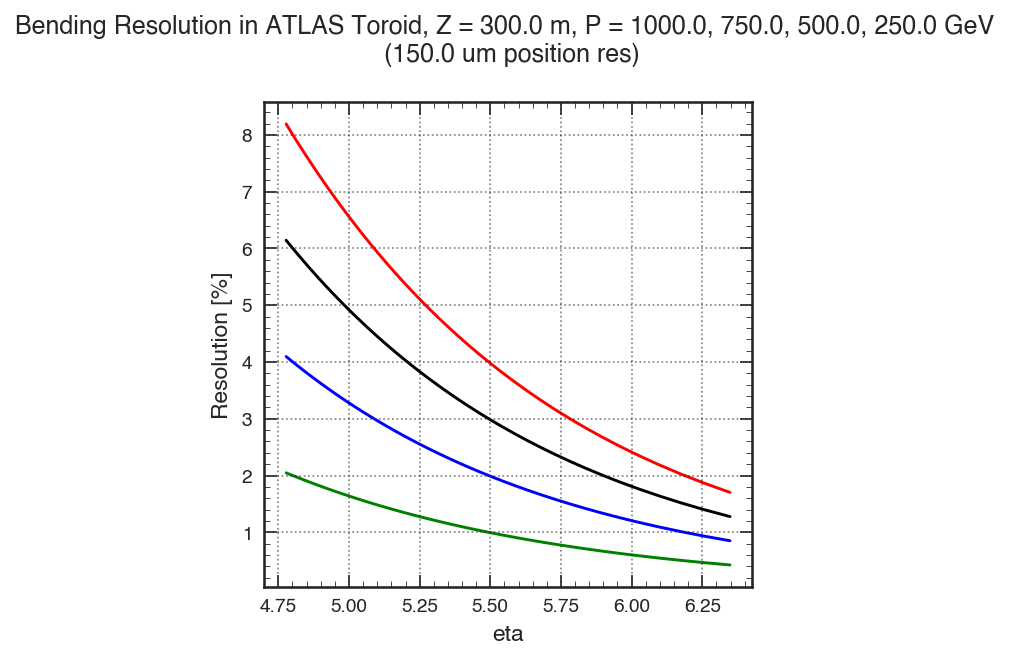

In [100]:
plt.plot(etavalues2, resvalues,'r')
plt.plot(etavalues2, resvalues1,'k')
plt.plot(etavalues2, resvalues2,'b')
plt.plot(etavalues2, resvalues3,'g')
plt.title('Bending Resolution in ATLAS Toroid, Z = %.1f m, P = %.1f, %.1f, %.1f, %.1f GeV \n (%.1f um position res)\n' %(Zpos2, pgen, pgen*0.75, pgen*0.5, pgen*0.25, res), fontsize=12)
plt.ylabel('Resolution [%]')
plt.xlabel('eta')

In [101]:
resvalues[0]

1.7033587020452818

In [102]:
rvalues.size

41

In [103]:
resvalues[40]

8.192344233646361

In [104]:
EtaRZ(5.1,60)

3.1600525787937217